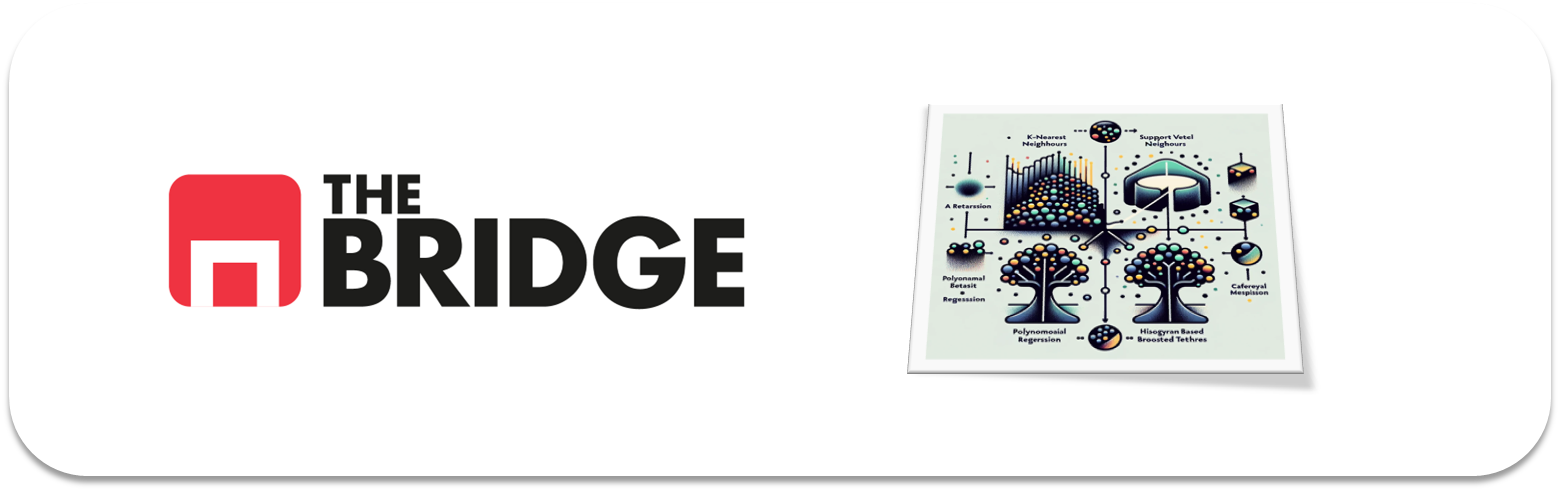

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### **Ejercicio 0**

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [ ]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 

### **1. El problema y los datos**

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

#### **1.1 Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.**

In [2]:
df_valoration_credit = pd.read_csv(
    "./data/credit_npo.csv",
    sep=",",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)
df_valoration_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df_valoration_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df_valoration_credit.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [5]:
df_valoration_credit.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10764
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11547
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

1. SeriousDlqin2yrs:

    - Descripción: Indicador binario de si la persona ha tenido impagos graves en los últimos 2 años.
    - Valores: 0 = No, 1 = Sí
    - Tipo: Categórica binaria (target)
    - Observación: Está muy desbalanceada (solo 6.9% positivos).

2. RevolvingUtilizationOfUnsecuredLines:

    - Descripción: Ratio entre el crédito utilizado y el crédito disponible en líneas no aseguradas (tarjetas, créditos personales).
    - Rango: 0 a 6 (hay valores anómalos >1).
    - Tipo: Numérica continua
    - Observación: Es una proporción, pero puede superar 1 por errores o deudas acumuladas.

3. age:

    - Descripción: Edad del solicitante.
    - Rango: 21 a 101 años.
    - Tipo: Numérica continua
    - Observación: Aunque es entera, conceptualmente es continua.

4. NumberOfTime30-59DaysPastDueNotWorse:

    - Descripción: Número de veces que el cliente ha estado 30–59 días en mora.
    - Rango: 0 a 98 (98 es un valor sospechoso → outlier codificado).
    - Tipo: Numérica discreta
    - Observación: Representa conteos.

5. DebtRatio:

    - Descripción: Ratio entre pagos mensuales y el ingreso mensual.
    - Rango: 0 a 99 (hay valores extremos).
    - Tipo: Numérica continua

6. MonthlyIncome:

    - Descripción: Ingreso mensual declarado.
    - Nulos: 721 valores faltantes.
    - Rango: 0 a 702,500 (hay outliers enormes).
    - Tipo: Numérica continua

7. NumberOfOpenCreditLinesAndLoans:

    - Descripción: Número de líneas de crédito abiertas (tarjetas, préstamos, hipotecas).
    - Rango: 0 a 49.
    - Tipo: Numérica discreta

8. NumberOfTimes90DaysLate:

    - Descripción: Número de veces con retrasos de 90 días o más.
    - Rango: 0 a 98 (mismo problema de outliers codificados).
    - Tipo: Numérica discreta

9. NumberRealEstateLoansOrLines:

    - Descripción: Número de préstamos inmobiliarios (hipotecas, líneas de crédito sobre vivienda).
    - Rango: 0 a 19.
    - Tipo: Numérica discreta

10. NumberOfTime60-89DaysPastDueNotWorse:

    - Descripción: Número de veces con retrasos de 60–89 días.
    - Rango: 0 a 98.
    - Tipo: Numérica discreta

11. NumberOfDependents:

    - Descripción: Número de dependientes económicos declarados.
    - Nulos: 177 valores faltantes.
    - Rango: 0 a 10.
    - Tipo: Numérica discreta

¿Por qué ninguna es categórica aunque muchas sean enteras?
- Porque todas representan cantidades reales (conteos, ratios, ingresos, edad).
No son códigos, no son etiquetas, no son categorías.
- Si el número representa una cantidad → numérica  
- Si el número representa una etiqueta → categórica

#### **1.2 ¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?**

**Problema de negocio:**
- El dataset “Give Me Some Credit” plantea un problema de clasificación binaria. El objetivo es predecir si un individuo experimentará dificultades financieras graves en los próximos dos años.

**Problema tecnico:**
- Construir un modelo de clasificación binaria. Es un problema de clasificacion Binaria porque el objetivo no es predecir un numero sino asignar cada individuo a una clase. Tiene que predecir la probabilidad de que un cliente entre en impago grave por lo que la variable target sera SeriousDlqin2yrs que es exactamente lo que indica esta variable:
    - 0 → No ha tenido impagos graves
    - 1 → Sí ha tenido impagos grave

**¿Qué tipo de problema estamos tratando?**
- Es un problema de clasificacion Binaria, supervisado.

**¿Cuál es la variable target?**
- SeriousDlqin2yrs


In [6]:
# Problema: Clasificación binaria supervisada
# Objetivo: predecir si un cliente entra en impago en los próximos 2 años.
target_col = "SeriousDlqin2yrs"


#### **1.3 Pinta la distribución de frecuencias del target y coméntala**

Frecuencias absolutas:
 SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

Frecuencias relativas:
 SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64


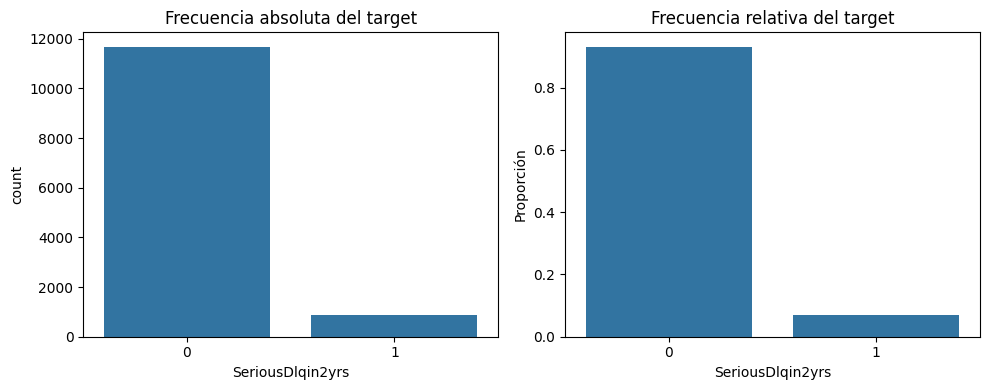

In [ ]:
# Frecuencias
target_counts = df_valoration_credit[target_col].value_counts().sort_index()
target_ratio = df_valoration_credit[target_col].value_counts(normalize=True).sort_index()

print("Frecuencias absolutas:\n", target_counts)
print("\nFrecuencias relativas:\n", target_ratio)

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=target_col, data=df_valoration_credit, ax=ax[0])
ax[0].set_title("Frecuencia absoluta del target")

sns.barplot(x=target_ratio.index, y=target_ratio.values, ax=ax[1])
ax[1].set_title("Frecuencia relativa del target")
ax[1].set_ylabel("Proporción")

plt.tight_layout()
plt.show()


La variable objetivo SeriousDlqin2yrs está fuertemente desbalanceada. Aproximadamente:

- 93% de los clientes no han tenido impagos graves
- Solo 7% sí los han tenido

En este caso, el coste de un falso negativo (predecir que no habrá impago cuando sí lo habrá) es muy alto.

### **2. Lista flexible de features**

In [8]:
df= df_valoration_credit.copy()

In [9]:
target_col = "SeriousDlqin2yrs"

features_num = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "DebtRatio",
    "MonthlyIncome",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberRealEstateLoansOrLines",
    "NumberOfDependents"
    # Añadiremos la variable outlier más adelante
]


### **3. Train/Test split (ANTES de la limpieza)**

In [10]:
train_set, test_set = train_test_split(
    df,
    test_size=0.20,
    random_state=42,
    stratify=df[target_col]
)


A partir de aquí:

- Aqui solo limpio X_train
- Guardo reglas (medianas, condiciones…)
- Aplico esas mismas reglas a X_test
- Esto evita leakage 

### **4. Copias de trabajo del train_set/test_set**

In [11]:
train_set_clean = train_set.copy()
test_set_clean = test_set.copy()

### **5. Limpieza de falsos nulos (SOLO en train) nulos normales y valores extraños**

- **MonthlyIncome**

In [ ]:
# 5.1 DIAGNÓSTICO DE NULOS ANTES DE LIMPIAR 

print("=== Train_set antes de limpiar ===")
train_set_clean[features_num].info()

print("\n=== Test_set antes de limpiar ===")
test_set_clean[features_num].info()


=== Train_set antes de limpiar ===
<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 8818 to 10443
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 1   age                                   10029 non-null  int64  
 2   DebtRatio                             10029 non-null  float64
 3   MonthlyIncome                         9446 non-null   float64
 4   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64  
 5   NumberOfTimes90DaysLate               10029 non-null  int64  
 6   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 7   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
 8   NumberRealEstateLoansOrLines          10029 non-null  int64  
 9   NumberOfDependents                    9888 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 861.9 KB

=

| Columna            | Nulos en TRAIN | Nulos en TEST | Tipo               | Naturaleza               |
|--------------------|----------------|----------------|---------------------|---------------------------|
| MonthlyIncome      | 583            | 138            | Numérica continua   | Ingresos mensuales       |
| NumberOfDependents | 141            | 36             | Numérica discreta   | Número de dependientes   |


- Aqui podemo ver que tienen nulos esas dos variables MonthyIncome y NumberOfDependents

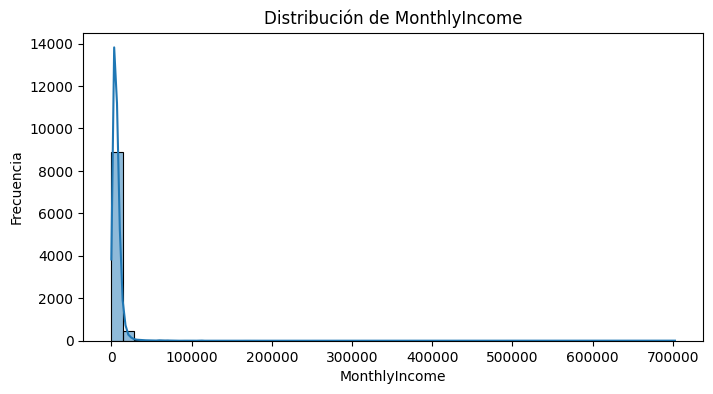

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(train_set_clean["MonthlyIncome"], bins=50, kde=True)
plt.title("Distribución de MonthlyIncome")
plt.xlabel("MonthlyIncome")
plt.ylabel("Frecuencia")
plt.show()

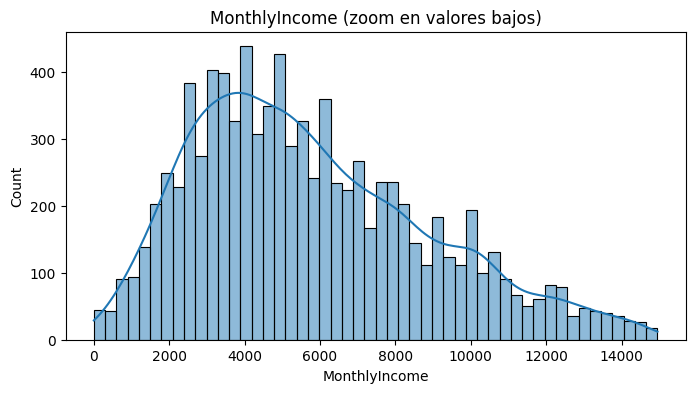

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(train_set_clean[train_set_clean["MonthlyIncome"] < 15000]["MonthlyIncome"], bins=50, kde=True)
plt.title("MonthlyIncome (zoom en valores bajos)")
plt.show()


In [15]:
sorted(train_set_clean["MonthlyIncome"].unique())




[np.float64(0.0),
 np.float64(1.0),
 np.float64(50.0),
 np.float64(100.0),
 np.float64(135.0),
 np.float64(200.0),
 np.float64(249.0),
 np.float64(254.0),
 np.float64(300.0),
 np.float64(350.0),
 np.float64(382.0),
 np.float64(400.0),
 np.float64(416.0),
 np.float64(444.0),
 np.float64(500.0),
 np.float64(516.0),
 np.float64(527.0),
 np.float64(541.0),
 np.float64(551.0),
 np.float64(600.0),
 np.float64(640.0),
 np.float64(650.0),
 np.float64(692.0),
 np.float64(701.0),
 np.float64(734.0),
 np.float64(749.0),
 np.float64(750.0),
 np.float64(764.0),
 np.float64(792.0),
 np.float64(820.0),
 np.float64(841.0),
 np.float64(877.0),
 np.float64(890.0),
 np.float64(898.0),
 np.float64(900.0),
 np.float64(929.0),
 np.float64(931.0),
 np.float64(959.0),
 np.float64(1015.0),
 np.float64(1046.0),
 np.float64(1100.0),
 np.float64(1101.0),
 np.float64(1152.0),
 np.float64(1172.0),
 np.float64(1184.0),
 np.float64(1191.0),
 np.float64(1197.0),
 np.float64(1200.0),
 np.float64(1241.0),
 np.float64(12

In [16]:
sorted(test_set_clean["MonthlyIncome"].unique())

[np.float64(0.0),
 np.float64(1.0),
 np.float64(200.0),
 np.float64(250.0),
 np.float64(254.0),
 np.float64(418.0),
 np.float64(501.0),
 np.float64(547.0),
 np.float64(600.0),
 np.float64(750.0),
 np.float64(801.0),
 np.float64(803.0),
 np.float64(970.0),
 np.float64(1035.0),
 np.float64(1213.0),
 np.float64(1235.0),
 np.float64(1300.0),
 np.float64(1305.0),
 np.float64(1399.0),
 np.float64(1400.0),
 np.float64(1442.0),
 np.float64(1451.0),
 np.float64(1529.0),
 np.float64(1601.0),
 np.float64(1636.0),
 np.float64(1649.0),
 np.float64(1666.0),
 np.float64(1713.0),
 np.float64(1849.0),
 np.float64(1899.0),
 np.float64(1916.0),
 np.float64(1968.0),
 np.float64(2036.0),
 np.float64(2083.0),
 np.float64(2114.0),
 np.float64(2180.0),
 np.float64(2200.0),
 np.float64(2203.0),
 np.float64(2265.0),
 np.float64(2279.0),
 np.float64(2280.0),
 np.float64(2296.0),
 np.float64(2300.0),
 np.float64(2324.0),
 np.float64(2340.0),
 np.float64(2395.0),
 np.float64(2431.0),
 np.float64(2560.0),
 np.float

In [17]:
train_set_clean["MonthlyIncome"].value_counts().get(0, 0)


np.int64(22)

In [18]:
train_set_clean["MonthlyIncome"].value_counts().get(1, 0)

np.int64(12)

**MonthlyIncome = 0 o 1 → ¿son valores válido?**

En este dataset, hay muchos ingresos = 0 y 1, pero en la vida real:
- ¿Una persona puede tener ingreso mensual 0 o 1? Sí, pero es raro.
- ¿Es más probable que sea un dato faltante mal codificado? Sí.

Conclusión técnica:  
- MonthlyIncome = 0 o 1 debe tratarse como NaN.

**DebtRatio**

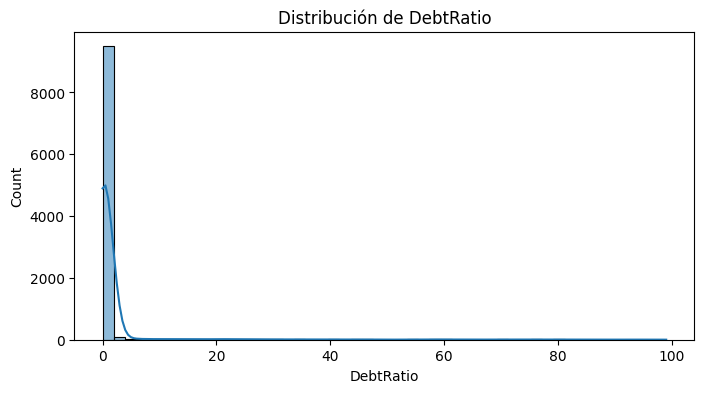

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(train_set_clean["DebtRatio"], bins=50, kde=True)
plt.title("Distribución de DebtRatio")
plt.show()

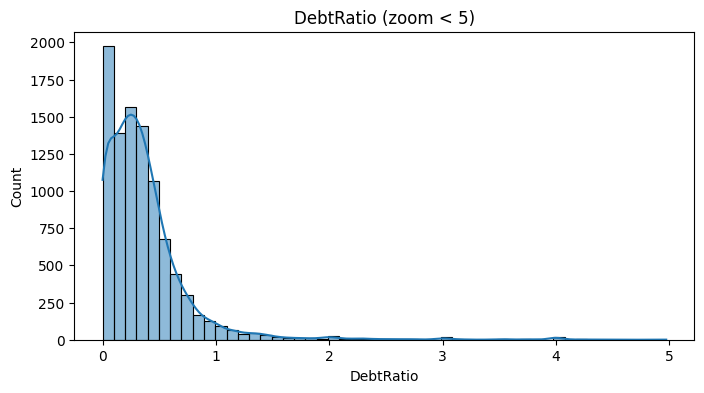

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(train_set_clean[train_set_clean["DebtRatio"] < 5]["DebtRatio"], bins=50, kde=True)
plt.title("DebtRatio (zoom < 5)")
plt.show()

In [21]:
sorted(train_set_clean["DebtRatio"].unique())


[np.float64(0.0),
 np.float64(2.6e-05),
 np.float64(3.93e-05),
 np.float64(6.62e-05),
 np.float64(9.15e-05),
 np.float64(9.91e-05),
 np.float64(0.000101698),
 np.float64(0.00012604),
 np.float64(0.000135117),
 np.float64(0.000137912),
 np.float64(0.000140528),
 np.float64(0.000150932),
 np.float64(0.000168039),
 np.float64(0.000171409),
 np.float64(0.000172295),
 np.float64(0.00019996),
 np.float64(0.000249984),
 np.float64(0.000257136),
 np.float64(0.000263713),
 np.float64(0.000266631),
 np.float64(0.000268649),
 np.float64(0.000279877),
 np.float64(0.000285687),
 np.float64(0.000298463),
 np.float64(0.000312451),
 np.float64(0.000313283),
 np.float64(0.000319949),
 np.float64(0.000320543),
 np.float64(0.000333222),
 np.float64(0.000344768),
 np.float64(0.000349101),
 np.float64(0.000353999),
 np.float64(0.000378215),
 np.float64(0.000379075),
 np.float64(0.000387447),
 np.float64(0.00039984),
 np.float64(0.000429996),
 np.float64(0.000444346),
 np.float64(0.000479846),
 np.float64(0

In [22]:
sorted(test_set_clean["DebtRatio"].unique())


[np.float64(0.0),
 np.float64(0.000153822),
 np.float64(0.000155836),
 np.float64(0.000217344),
 np.float64(0.000286999),
 np.float64(0.000374742),
 np.float64(0.0004995),
 np.float64(0.000580159),
 np.float64(0.000720115),
 np.float64(0.000737282),
 np.float64(0.000749906),
 np.float64(0.000852031),
 np.float64(0.000856898),
 np.float64(0.000864304),
 np.float64(0.000882613),
 np.float64(0.000909008),
 np.float64(0.000959923),
 np.float64(0.000999833),
 np.float64(0.001162115),
 np.float64(0.00119976),
 np.float64(0.001207671),
 np.float64(0.001249609),
 np.float64(0.001313869),
 np.float64(0.001371272),
 np.float64(0.00159968),
 np.float64(0.001638002),
 np.float64(0.001661743),
 np.float64(0.001786626),
 np.float64(0.001799856),
 np.float64(0.001818549),
 np.float64(0.001828362),
 np.float64(0.001858736),
 np.float64(0.00192431),
 np.float64(0.001934985),
 np.float64(0.002014099),
 np.float64(0.002210294),
 np.float64(0.002352249),
 np.float64(0.002382134),
 np.float64(0.002412961),

**DebtRatio= 0 → ¿es válido?**

DebtRatio = pagos mensuales / ingresos mensuales.

- Si MonthlyIncome = 0, entonces DebtRatio = 0 es matemáticamente imposible.

Esto indica que:

- MonthlyIncome = 0 → probablemente es un missing
- DebtRatio = 0 en esos casos → también es un missing derivado

Conclusión técnica:  
- DebtRatio = 0 cuando MonthlyIncome = 0 también es un falso nulo

Los valores 0 y 1 en MonthlyIncome, así como los valores 0 en DebtRatio asociados a ingresos nulos, no representan información real sino errores de registro. Por tanto, deben tratarse como datos faltantes. Es imprescindible identificarlos y convertirlos en NaN antes de imputar con la mediana, ya que la mediana debe calcularse únicamente sobre valores válidos. Si no se realiza esta limpieza previa, la imputación se basaría en datos incorrectos y el modelo aprendería patrones distorsionados. La secuencia correcta es: detectar falsos nulos → convertirlos en NaN → imputar con la mediana.

**Variables de retrasos (30–59, 60–89, 90 días)**

Ejemplo:

- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse

In [23]:
cols_delay = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate",
    "NumberOfTime60-89DaysPastDueNotWorse"
]

for col in cols_delay:
    print(f"\nValores únicos en {col}:")
    print(sorted(df_valoration_credit[col].unique()))


Valores únicos en NumberOfTime30-59DaysPastDueNotWorse:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(98)]

Valores únicos en NumberOfTimes90DaysLate:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(13), np.int64(98)]

Valores únicos en NumberOfTime60-89DaysPastDueNotWorse:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(11), np.int64(98)]


Observo que contienen todas esas columnas valores de 98 muy extrañños que no creo que representen retrasos reales por lo que habra que tratarlos.Voy a ver cuantos tiene cada columna de valor 98:

In [24]:
train_set_clean[
    train_set_clean["NumberOfTimes90DaysLate"] > 20
]["NumberOfTimes90DaysLate"].value_counts()

NumberOfTimes90DaysLate
98    14
Name: count, dtype: int64

In [25]:
train_set_clean[
    train_set_clean["NumberOfTime30-59DaysPastDueNotWorse"] > 20
]["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
98    14
Name: count, dtype: int64

In [26]:
train_set_clean[
    train_set_clean["NumberOfTime60-89DaysPastDueNotWorse"] > 20
]["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
98    14
Name: count, dtype: int64

**RevolvingUtilizationOfUnsecuredLines > 1**

- Este ratio debería estar entre 0 y 1.
- Pero hay valores hasta 6.0.

Esto significa:

- Error de registro
- Deuda acumulada que excede el límite
- O un valor corrupto

Conclusión técnica:  

- Valores > 1 deben revisarse; muchos proyectos los recortan a 1 o los tratan como outliers

In [27]:
train_set_clean["RevolvingUtilizationOfUnsecuredLines"].sort_values().unique()

array([0.00000000e+00, 9.93000000e-06, 1.25000000e-05, ...,
       3.12624585e+00, 5.34765235e+00, 6.00000000e+00], shape=(8628,))

-Aqui ya aplicamos todo lo que hemos visto para cambiar esos valores que creemos que son erroneos a NaN.

1. MonthlyIncome → imputar con la mediana
- Razón técnica
    - Es una variable muy sesgada (hay ingresos de 0 a 702.500).
    - La media estaría distorsionada por outliers.
    - La mediana es robusta y representa mejor el ingreso típico.

- Razón de negocio
    - El ingreso es una magnitud continua.
    - La mediana es una estimación razonable del ingreso “central”.

- Conclusión:  
    - Sí, imputar con la mediana es la mejor opción.

2. NumberOfDependents → imputar con la mediana
- Razón técnica
    - Es una variable discreta (0,1,2,3…).
    - La distribución está sesgada hacia 0 y 1.
    - La mediana suele ser 0, lo cual tiene sentido.

- Razón de negocio
    - La mayoría de personas tienen 0 o 1 dependientes.
    - Imputar con la mediana evita inventar dependientes.

- Conclusión:  
    - También se imputa con la mediana.

In [28]:
# MonthlyIncome = 0 o 1 → NaN
train_set_clean.loc[train_set_clean["MonthlyIncome"] <= 1, "MonthlyIncome"] = np.nan

# DebtRatio = 0 cuando MonthlyIncome era NaN → NaN
train_set_clean.loc[
    (train_set_clean["DebtRatio"] == 0) &
    (train_set_clean["MonthlyIncome"].isna()),
    "DebtRatio"
] = np.nan

# Valores 98 en retrasos → NaN
cols_delay = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate",
    "NumberOfTime60-89DaysPastDueNotWorse"
]

for col in cols_delay:
    train_set_clean.loc[train_set_clean[col] > 20, col] = np.nan


#### **5.1. Aplicar la MISMA limpieza al test**

In [29]:
test_set_clean.loc[test_set_clean["MonthlyIncome"] <= 1, "MonthlyIncome"] = np.nan

test_set_clean.loc[
    (test_set_clean["DebtRatio"] == 0) &
    (test_set_clean["MonthlyIncome"].isna()),
    "DebtRatio"
] = np.nan

for col in cols_delay:
    test_set_clean.loc[test_set_clean[col] > 20, col] = np.nan


#### **5.2 Crear variable outlier (train y test)**

La columna resultante es:
- RevolvingUtilizationOfUnsecuredLines_outlier

Con valores:

- 1 → el cliente está sobreendeudado
- 0 → el cliente NO está sobreendeudado

In [30]:
train_set_clean["RevolvingUtilizationOfUnsecuredLines_outlier"] = (
    train_set_clean["RevolvingUtilizationOfUnsecuredLines"] > 1
).astype(int)

test_set_clean["RevolvingUtilizationOfUnsecuredLines_outlier"] = (
    test_set_clean["RevolvingUtilizationOfUnsecuredLines"] > 1
).astype(int)

features_num.append("RevolvingUtilizationOfUnsecuredLines_outlier")


#### **5.3 Imputación con mediana (SOLO usando train)**

In [31]:
median_MI = train_set_clean["MonthlyIncome"].median()
median_ND = train_set_clean["NumberOfDependents"].median()
median_DR = train_set_clean["DebtRatio"].median()
median_delays = {col: train_set_clean[col].median() for col in cols_delay}

# Train
train_set_clean["MonthlyIncome"] = train_set_clean["MonthlyIncome"].fillna(median_MI)
train_set_clean["NumberOfDependents"] = train_set_clean["NumberOfDependents"].fillna(median_ND)
train_set_clean["DebtRatio"] = train_set_clean["DebtRatio"].fillna(median_DR)

for col in cols_delay:
    train_set_clean[col] = train_set_clean[col].fillna(median_delays[col])

# Test
test_set_clean["MonthlyIncome"] = test_set_clean["MonthlyIncome"].fillna(median_MI)
test_set_clean["NumberOfDependents"] = test_set_clean["NumberOfDependents"].fillna(median_ND)
test_set_clean["DebtRatio"] = test_set_clean["DebtRatio"].fillna(median_DR)

for col in cols_delay:
    test_set_clean[col] = test_set_clean[col].fillna(median_delays[col])


In [32]:
train_set_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 8818 to 10443
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   SeriousDlqin2yrs                              10029 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines          10029 non-null  float64
 2   age                                           10029 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse          10029 non-null  float64
 4   DebtRatio                                     10029 non-null  float64
 5   MonthlyIncome                                 10029 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans               10029 non-null  int64  
 7   NumberOfTimes90DaysLate                       10029 non-null  float64
 8   NumberRealEstateLoansOrLines                  10029 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse          10029 non-null  f

In [33]:
test_set_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 10378 to 6620
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   SeriousDlqin2yrs                              2508 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines          2508 non-null   float64
 2   age                                           2508 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse          2508 non-null   float64
 4   DebtRatio                                     2508 non-null   float64
 5   MonthlyIncome                                 2508 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans               2508 non-null   int64  
 7   NumberOfTimes90DaysLate                       2508 non-null   float64
 8   NumberRealEstateLoansOrLines                  2508 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse          2508 non-null   fl

Ambos tanto el train_set como el test_set_estan limpios.

### **6. Mini-EDA**

Queremos ver la matriz de confusion para ver las correlaciones entre las variables y sobre todo con la variable target.

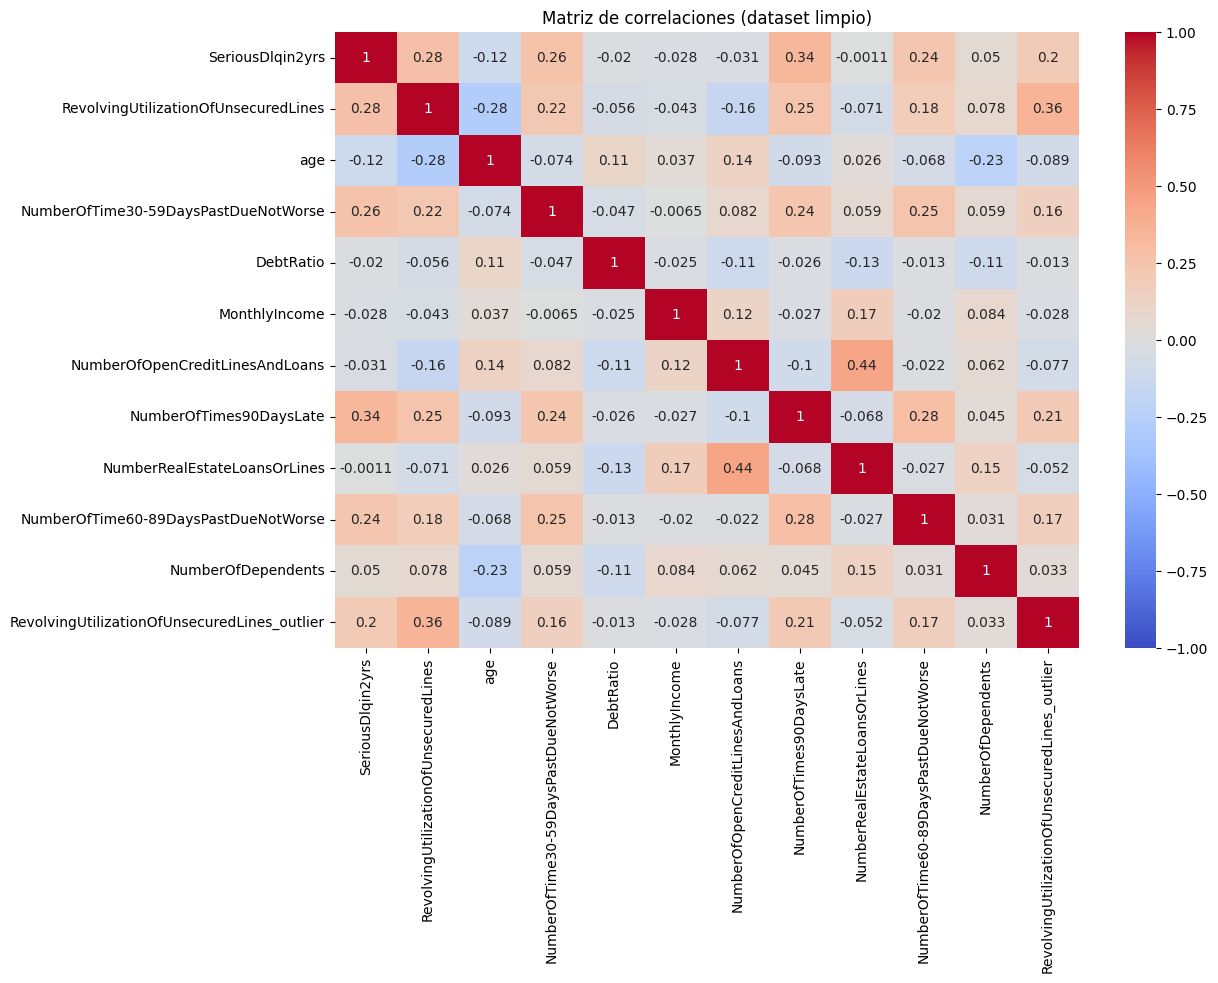

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(
    train_set_clean.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Matriz de correlaciones (dataset limpio)")
plt.show()


En la práctica:
- 0.7 a 1.0 → relación fuerte
- 0.3 a 0.7 → relación moderada
- 0.0 a 0.3 → relación débil
- < 0 → relación inversa

No observamos ningun multiconialidad grave  no hay correlacion > 0,7

Lo que observamos en la matriz de correlacion son correlaciones moderadas, no extremadamente fuertes. 

Correlaciones más relevantes:

- Las más altas (≈ 0.25 – 0.45), que ya merecen atención:

    - NumberOfOpenCreditLinesAndLoans ↔ NumberRealEstateLoansOrLines ≈ 0.45
    - Bastante lógica: quien tiene más líneas de crédito suele tener más préstamos inmobiliarios.

- SeriousDlqin2yrs ↔ NumberOfTimes90DaysLate≈ 0.35

    - Muy relevante para el modelo: retrasos graves → mayor probabilidad de default.

- RevolvingUtilizationOfUnsecuredLines ↔ SeriousDlqin2yrs≈ 0.28

    - Uso alto del crédito sin garantía se asocia con más riesgo.

- NumberOfTime30-59DaysPastDueNotWorse ↔ SeriousDlqin2yrs≈ 0.25
- NumberOfTime60-89DaysPastDueNotWorse ↔ SeriousDlqin2yrs≈ 0.25

    - Todas las variables de retrasos en pagos están correlacionadas entre sí y con el target, como era de esperar.

Correlaciones negativas interesantes:

- age ↔ RevolvingUtilizationOfUnsecuredLines ≈ -0.28
    - Personas más jóvenes tienden a usar más crédito disponible.

- age ↔ NumberOfDependents ≈ -0.22
    - Algo contraintuitivo, pero común en este dataset.

Queremos ver la correlacion de cada variable con la variable target:

- una medida lineal, que indica cuánto se mueve la variable objetivo cuando se mueve cada predictor
- valores entre -1 y 1

Esto te dice:

- qué variables están más relacionadas linealmente con el impago

- cuáles aportan más señal

- cuáles son casi irrelevantes

Es una forma simple de medir relevancia, pero solo captura relaciones lineales.

Te dice qué variables están más relacionadas con el impago

In [35]:
train_set_clean.corr(numeric_only=True)["SeriousDlqin2yrs"].sort_values(ascending=False)


SeriousDlqin2yrs                                1.000000
NumberOfTimes90DaysLate                         0.341389
RevolvingUtilizationOfUnsecuredLines            0.280751
NumberOfTime30-59DaysPastDueNotWorse            0.258565
NumberOfTime60-89DaysPastDueNotWorse            0.239794
RevolvingUtilizationOfUnsecuredLines_outlier    0.202287
NumberOfDependents                              0.050414
NumberRealEstateLoansOrLines                   -0.001130
DebtRatio                                      -0.020494
MonthlyIncome                                  -0.028365
NumberOfOpenCreditLinesAndLoans                -0.031254
age                                            -0.115529
Name: SeriousDlqin2yrs, dtype: float64

-Aqui quiero ver todos los boxplot de las variables con la variable target.

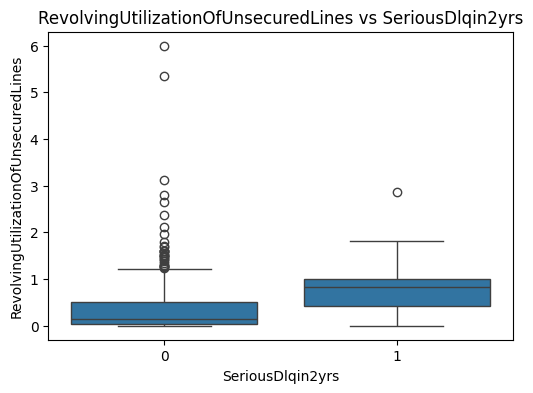

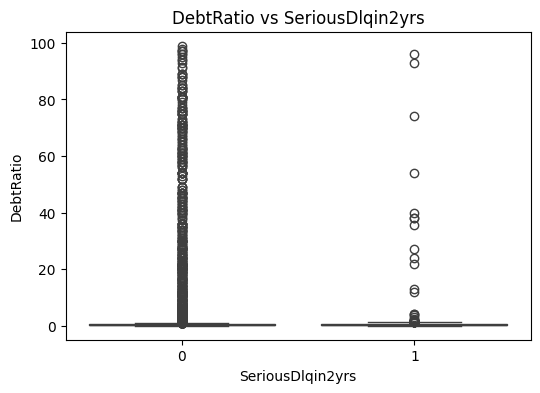

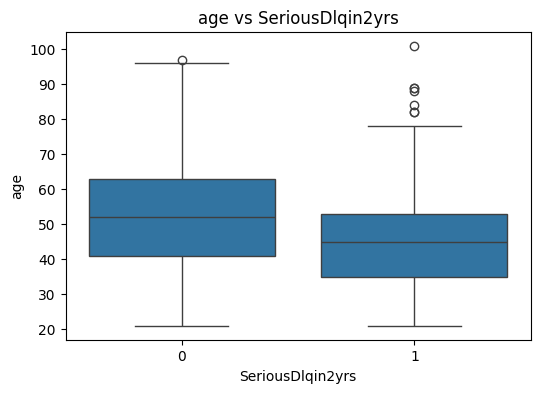

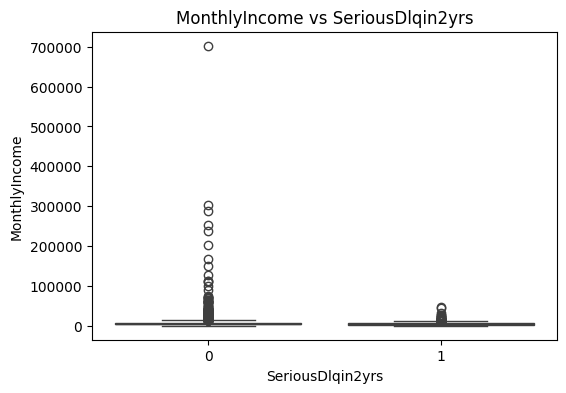

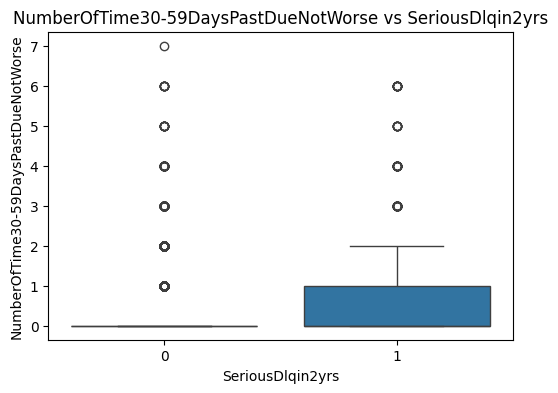

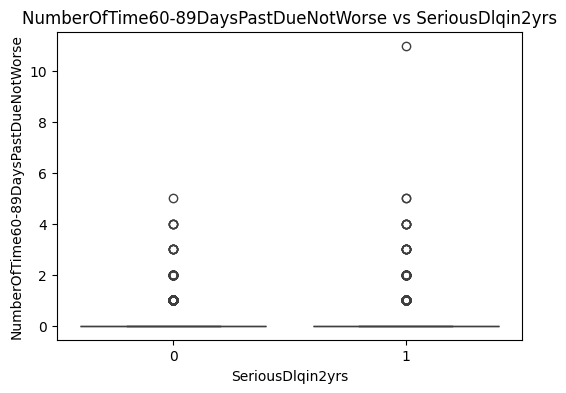

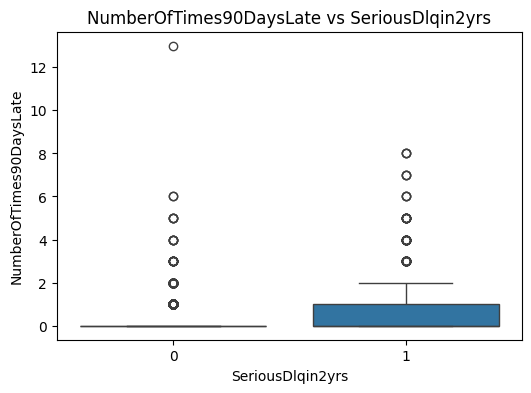

In [36]:
variables = [
    "RevolvingUtilizationOfUnsecuredLines",
    "DebtRatio",
    "age",
    "MonthlyIncome",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate"
]

for var in variables:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="SeriousDlqin2yrs", y=var, data=train_set_clean)
    plt.title(f"{var} vs SeriousDlqin2yrs")
    plt.show()


1. RevolvingUtilizationOfUnsecuredLines vs SeriousDlqin2yrs
    - Los clientes con impago (1) tienen una mediana ligeramente superior en el uso del crédito sin garantía.
    - La dispersión es mayor en el grupo de impago, con más outliers extremos.
    - Conclusión: esta variable sí discrimina riesgo, aunque no de forma radical. Su inclusión en el modelo está justificada.

2. DebtRatio vs SeriousDlqin2yrs
    - El grupo con impago muestra una distribución más amplia y más valores extremos.
    - La mediana es similar, pero la asimetría y los outliers son más pronunciados en el grupo 1.
    - Conclusión: el DebtRatio no es linealmente correlativo, pero sí aporta información sobre volatilidad financiera. Puede ser útil en modelos no lineales como Random Forest.

3. age vs SeriousDlqin2yrs
    - El grupo con impago tiene una mediana de edad más baja.
    - Hay más outliers en el grupo 1, lo que sugiere mayor variabilidad entre los jóvenes.
    - Conclusión: la edad tiene una relación inversa débil con el impago, pero puede ayudar como variable estabilizadora.

4. MonthlyIncome vs SeriousDlqin2yrs
    - La mediana es similar entre ambos grupos.
    - El grupo sin impago (0) tiene muchos más outliers positivos, es decir, ingresos muy altos.
    - Conclusión: los ingresos extremos parecen proteger contra el impago. La variable tiene valor en los extremos, aunque no en la mediana.

5. NumberOfTime30-59DaysPastDueNotWorse vs SeriousDlqin2yrs
    - El grupo con impago tiene una mediana claramente superior.
    - La distribución está desplazada hacia valores más altos.
    - Conclusión: esta variable es predictiva del impago. Debe estar en el modelo.

6. NumberOfTime60-89DaysPastDueNotWorse vs SeriousDlqin2yrs
    - Patrón similar al anterior: mediana más alta en el grupo 1.
    - Conclusión: también relevante. Refuerza la idea de que los retrasos moderados son señales de riesgo.

7. NumberOfTimes90DaysLate vs SeriousDlqin2yrs
    - Es la variable con mayor diferencia entre grupos.
    - El grupo con impago tiene una mediana mucho más alta y una distribución claramente desplazada.
    - Conclusión: esta es la variable más potente para predecir impago. Debe tener peso en el modelo.

Conclusión general
 
- Las variables de retrasos en pagos (30–59, 60–89, 90+) son las más discriminantes.
- RevolvingUtilizationOfUnsecuredLines y DebtRatio aportan información sobre estrés financiero.
- age e income tienen patrones más sutiles, pero pueden ayudar a modular el riesgo.
- Los boxplots confirman lo que ya sugería la matriz de correlación: no hay una sola variable dominante, pero hay varias que aportan valor conjunto.

Para que se vean mejor algunas de las variables:

(0.0, 20000.0)

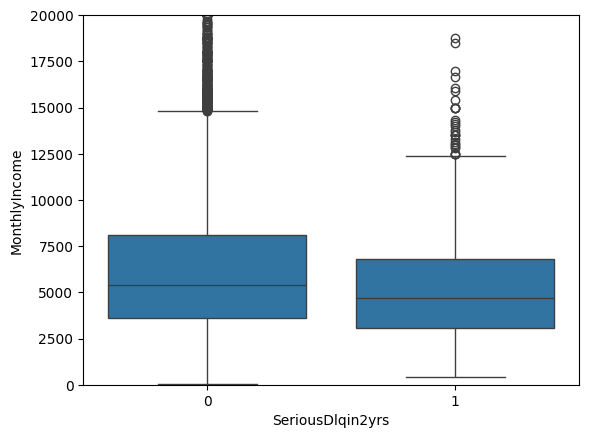

In [37]:
sns.boxplot(x="SeriousDlqin2yrs", y="MonthlyIncome", data=train_set_clean)
plt.ylim(0, 20000)


(0.0, 2.0)

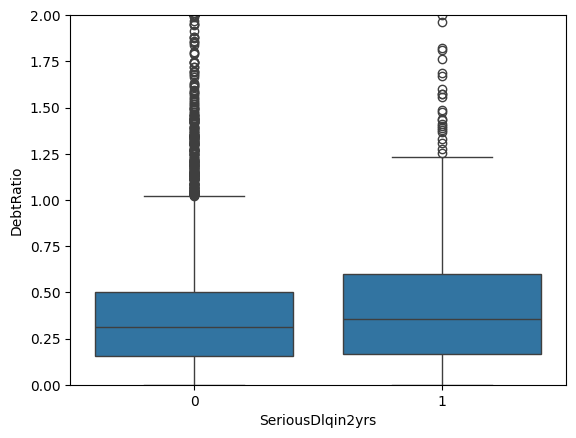

In [38]:
sns.boxplot(x="SeriousDlqin2yrs", y="DebtRatio", data=train_set_clean)
plt.ylim(0, 2)

(0.0, 2.0)

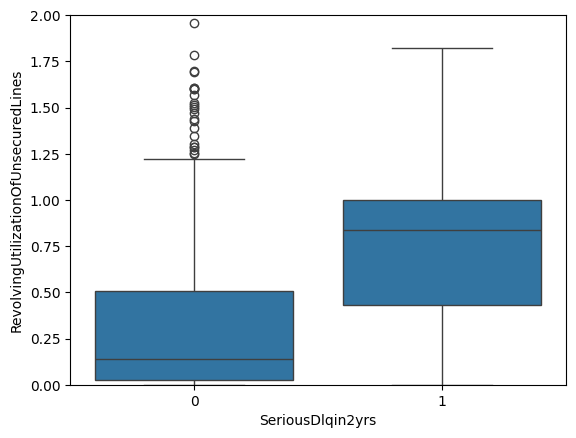

In [39]:
sns.boxplot(x="SeriousDlqin2yrs", y="RevolvingUtilizationOfUnsecuredLines", data=train_set_clean)
plt.ylim(0, 2)

- RevolvingUtilizationOfUnsecuredLines vs SeriousDlqin2yrs (escala ajustada)
    - Con la escala ajustada, se aprecia mejor que el grupo con impago (1) tiene una mediana más alta y una dispersión más amplia.
    - El grupo sin impago (0) tiene muchos outliers, pero la mayoría de los valores están concentrados en rangos bajos.
    - Conclusión adicional: el uso excesivo del crédito sin garantía es más común entre los clientes con impago, y la variable tiene capacidad discriminante en el rango central, no solo en los extremos.

- DebtRatio vs SeriousDlqin2yrs (escala limitada a 0–2)
    - Al limitar la escala, se elimina el ruido de los valores extremos y se revela que el grupo con impago tiene una distribución más asimétrica y una mediana ligeramente superior.
    - Se observan más valores altos en el grupo 1, incluso dentro del rango 0–2.
    - Conclusión adicional: el DebtRatio tiene valor predictivo en rangos medios, no solo en los outliers. Esto justifica su inclusión en modelos que capturen no linealidades.

- MonthlyIncome vs SeriousDlqin2yrs (escala limitada a 0–20000)
    - La escala ajustada permite ver que la mediana es similar entre ambos grupos, pero el grupo sin impago (0) tiene más dispersión hacia ingresos altos.
    - El grupo con impago tiene una distribución más compacta, con menos ingresos extremos.
    - Conclusión adicional: los ingresos altos parecen proteger contra el impago, aunque la mediana no lo refleje. Esta variable tiene valor en los extremos superiores.

### **7. Eleccion de modelos**

La combinación más estándar y más defendible:

## Modelos utilizados

| Modelo               | Tipo                   | Ventaja                               |
|----------------------|------------------------|----------------------------------------|
| Logistic Regression  | Lineal                 | Interpretación y modelo baseline       |
| Random Forest        | No lineal              | Potencia predictiva y robustez         |
| KNN                  | Basado en distancias   | Requisito del enunciado; comparación   |

Con estos tres cubrimos:

- Linealidad (Logistic regresion)
- No linealidad (Random Forest)
- Distancias (KNN)
- Interpretabilidad (Logistic Regresion)
- Robustez (Random Forest)
- Comparación metodológica (los tres modelos)


¿Qué modelos necesitan ESCALADO?
- KNN — Sí o sí necesita escalado. Por qué:  
    - KNN calcula distancias entre puntos.
    - Si una variable está en un rango enorme (ej. ingresos 0–50.000) y otra en un rango pequeño (ej. dependientes 0–10), la variable grande domina la distancia.
    - Sin escalado, KNN no funciona bien.
    - Conclusión: KNN requiere escalado (StandardScaler o RobustScaler).
- Regresión Logística — Muy recomendable escalar.Por qué:

    - Es un modelo lineal basado en gradiente.
    - Si las variables tienen escalas muy distintas, la convergencia es más lenta y menos estable.
    - Los coeficientes quedan desbalanceados y difíciles de interpretar.
    - Con escalado, la regresión logística es más estable y más interpretable.
    - Conclusión: Regresión logística debería escalarse.

- Random Forest — NO necesita escalado. Por qué:
    - Los árboles dividen por umbrales (“¿x > 3000?”), no por distancias.
    - No le importa si una variable va de 0 a 10 o de 0 a 100.000.
    - Es robusto a outliers y a escalas distintas.
    - Conclusión: Random Forest no necesita escalado.

¿Qué modelos necesitan TRANSFORMACIONES (log, raíz, polinómica)?

- Regresión Logística: Puede beneficiarse de transformaciones si:
    - la relación entre variable y target no es lineal
    - hay colas largas (skewness)
    - hay outliers extremos

- KNN: Transformaciones pueden ayudar, pero solo si:
    - la variable tiene outliers extremos
    - la distribución está muy sesgada
    - Pero no es obligatorio.

- Random Forest: No necesita transformaciones:
    - maneja no linealidad
    - maneja outliers
    - maneja skewness



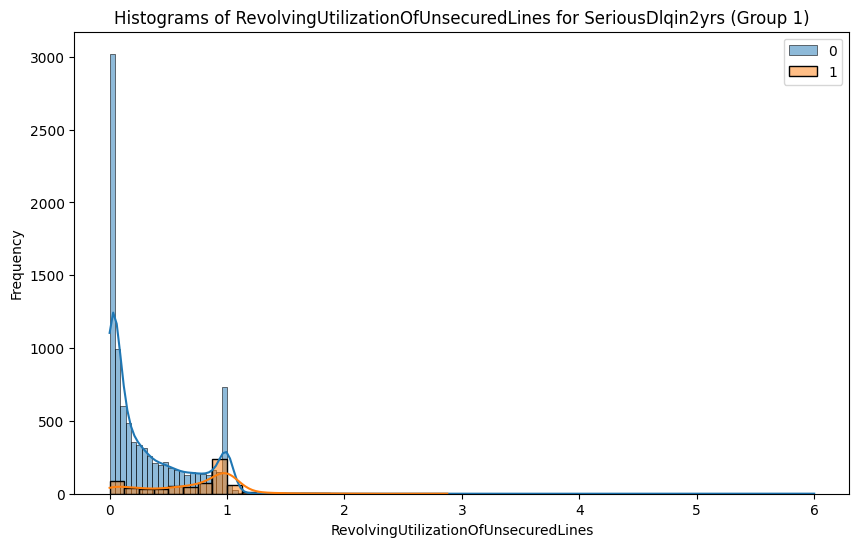

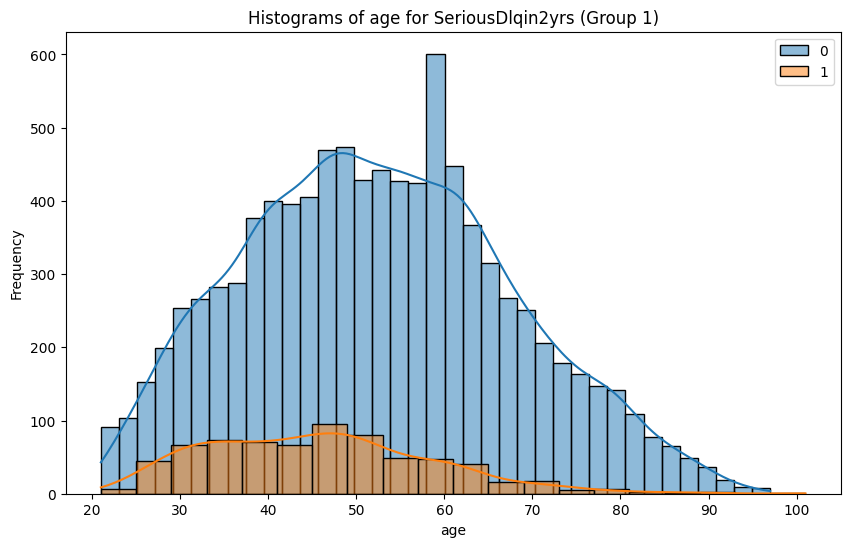

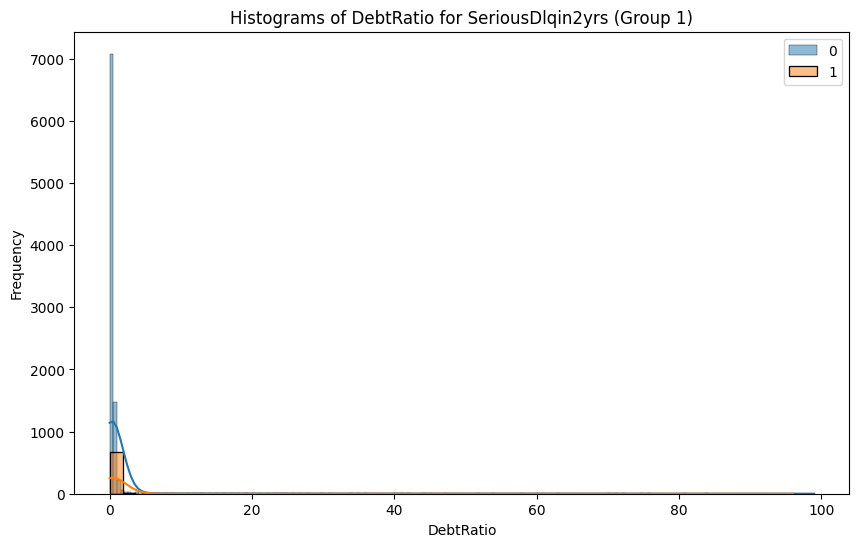

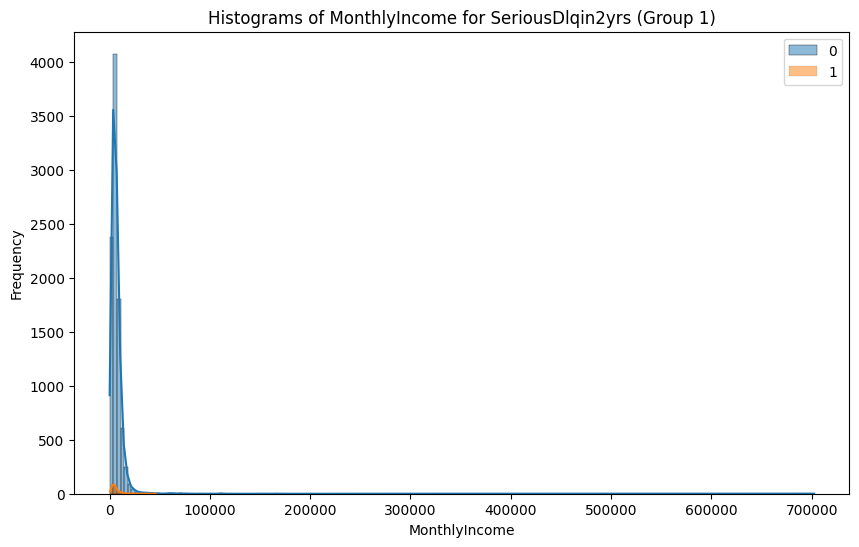

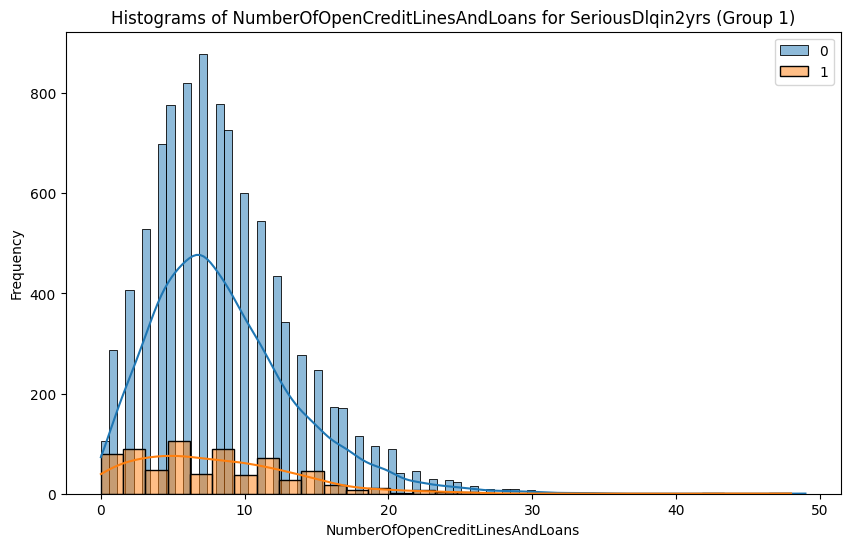

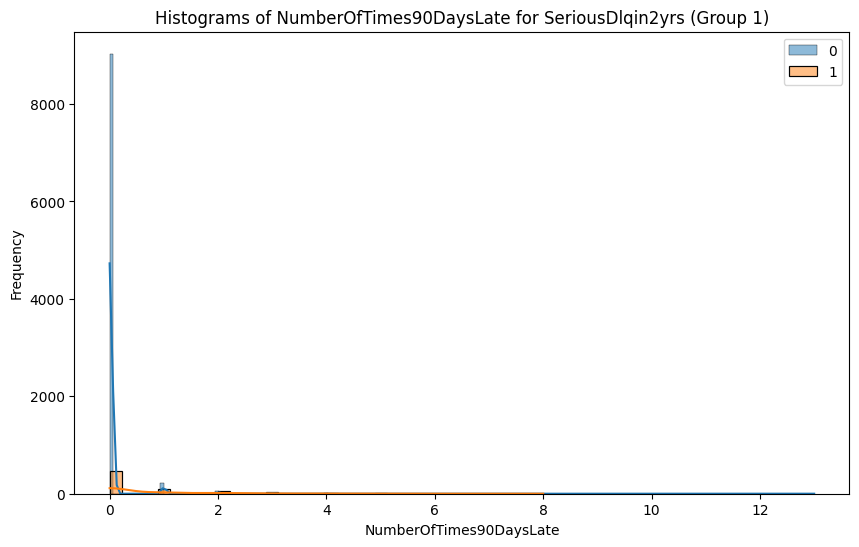

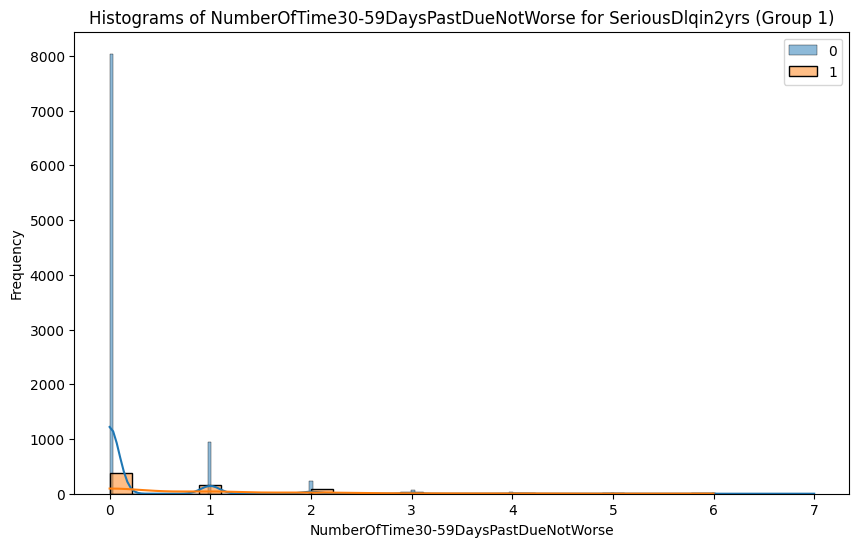

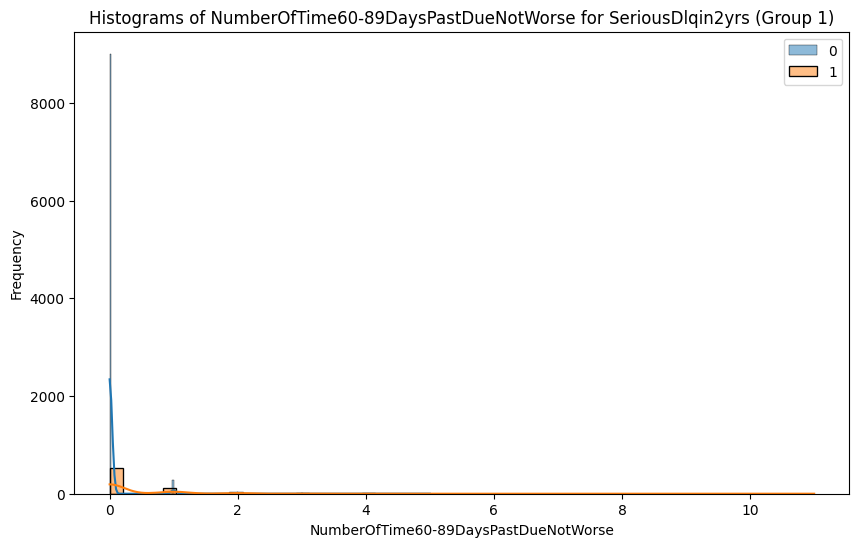

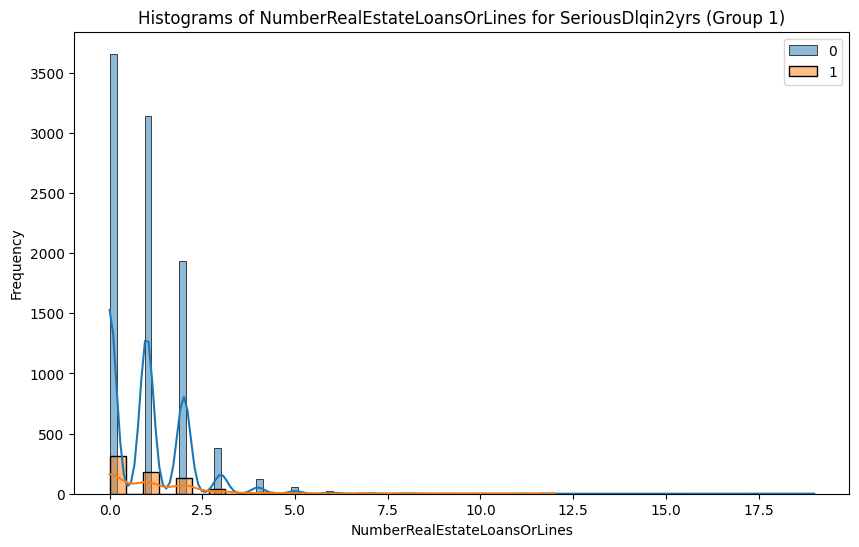

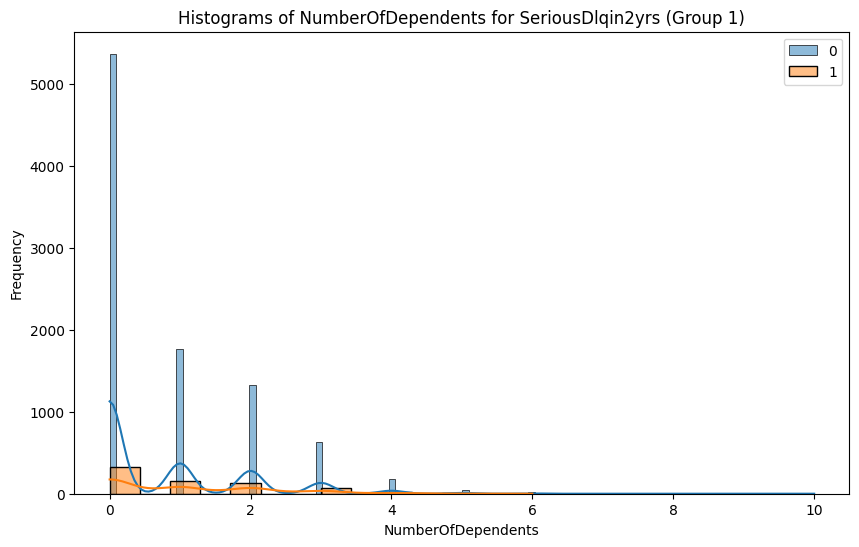

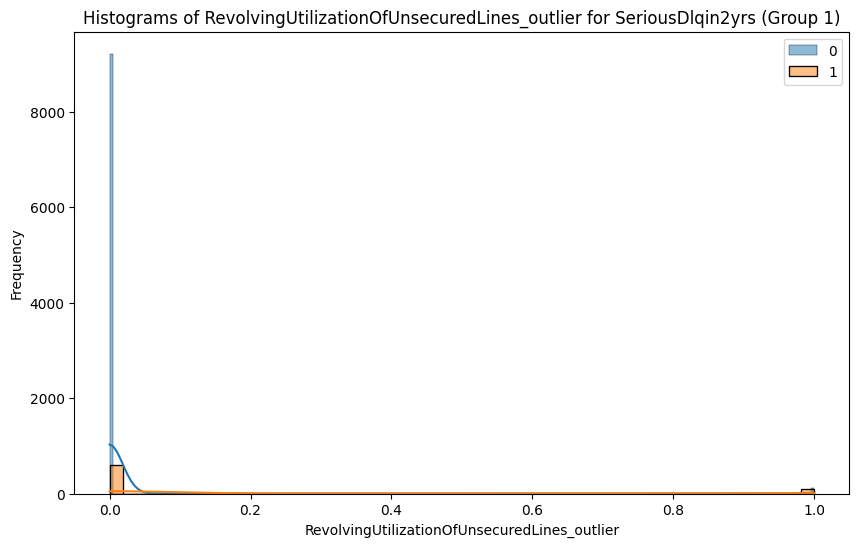

In [40]:
for col in features_num:
    bt.plot_grouped_histograms(train_set_clean, cat_col=target_col, num_col=col, group_size=3)


- Tras analizar las distribuciones mediante histogramas estratificados por la variable objetivo, se observó que algunas variables financieras (RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome) presentan asimetría hacia la derecha y colas largas, patrón habitual en datos económicos.
- No obstante, se optó por no aplicar transformaciones logarítmicas ni polinómicas para preservar la interpretabilidad y mantener un pipeline sencillo, apoyándose en la robustez de los modelos basados en árboles.
- Para los modelos sensibles a la escala (KNN y Regresión Logística) se aplicó un escalado robusto de las variables numéricas, mientras que para Random Forest no fue necesario ningún tipo de escalado ni transformación adicional.

### **8. SEPARAR X_train, y_train, X_test, y_test**

In [41]:
X_train = train_set_clean[features_num]
y_train = train_set_clean[target_col]

X_test = test_set_clean[features_num]
y_test = test_set_clean[target_col]

### **9. Construccion de modelo**

In [42]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Escalador robusto para modelos sensibles a la escala
scaler = RobustScaler()

# Regresión logística (requiere escalado)
pipe_logreg = ImbPipeline([
    ("scaler", scaler),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=200, random_state=42))
])

# Random Forest (no requiere escalado)
pipe_rf = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(random_state=42))
])

# KNN (requiere escalado)
pipe_knn = ImbPipeline([
    ("scaler", scaler),
    ("smote", SMOTE(random_state=42)),
    ("model", KNeighborsClassifier())
])


In [43]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": pipe_logreg,
    "Random Forest": pipe_rf,
    "KNN": pipe_knn
}

results = {}

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="recall_macro")
    results[name] = score.mean()
    print(f"{name}: Recall medio = {score.mean():.4f}")


Logistic Regression: Recall medio = 0.7722
Random Forest: Recall medio = 0.6331
KNN: Recall medio = 0.6759


#### **9.1 Eleccion del mejor modelo**

In [44]:
# Ordenar los modelos por su score (de mayor a menor)
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Extraer nombres
best_model_name = sorted_results[0][0]
second_best_model_name = sorted_results[1][0]
third_best_model_name = sorted_results[2][0]

print("Best model:", best_model_name)
print("Second best model:", second_best_model_name)
print("Third best model:", third_best_model_name)

# Instanciar los modelos
best_model = models[best_model_name]
second_best_model = models[second_best_model_name]
third_best_model = models[third_best_model_name]


Best model: Logistic Regression
Second best model: KNN
Third best model: Random Forest


In [45]:
best_model

Pipeline(steps=[('scaler', RobustScaler()), ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=200, random_state=42))])

#### **9.2 Entrenamiento del mejor modelo**

In [46]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=200, random_state=42))])

#### **9.3 Resultados de Train**

In [47]:
y_predict_train=best_model.predict(X_train)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      9338
           1       0.21      0.75      0.33       691

    accuracy                           0.79     10029
   macro avg       0.60      0.77      0.60     10029
weighted avg       0.92      0.79      0.84     10029



Clase 1 (impago)

- Recall 0.75 → el modelo detecta el 75% de los impagos en train.
- Precision 0.21 → de todos los que marca como impago, muchos en realidad sí pagan (muchos falsos positivos).

Clase 0 (paga)

- Precision 0.98 → casi todos los que marca como “paga” realmente pagan.
- Recall 0.79 → se “deja fuera” un 21% de los que pagan (porque los marca como 1)

Recall 0.75 → muy bueno para train.
El modelo detecta 3 de cada 4 impagos.
Esto es lo que quieres.

Precision 0.21 → normal y esperable.
¿Por qué tan baja?
Porque SMOTE hace que el modelo aprenda en un dataset balanceado, pero cuando predices sobre el train real (desbalanceado), aparecen muchos falsos positivos.

Esto NO es un problema.  
Es el comportamiento típico de un modelo que prioriza recall.

#### **9.4 Features importance del modelo**

In [ ]:
# Feature Importances del mejor modelo (Logistic Regression) 

import pandas as pd

# Extraer coeficientes del modelo dentro del pipeline
coefs = best_model.named_steps["model"].coef_[0]

# Nombres de las columnas originales
feature_names = X_train.columns

# Crear dataframe ordenado por importancia
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": coefs
}).sort_values("importance", ascending=False)

print("=== Feature Importances (Logistic Regression) ===")
print(importance_df)


=== Feature Importances (Logistic Regression) ===
                                         feature  importance
0           RevolvingUtilizationOfUnsecuredLines    1.313442
5                        NumberOfTimes90DaysLate    0.980907
7           NumberOfTime60-89DaysPastDueNotWorse    0.799569
6           NumberOfTime30-59DaysPastDueNotWorse    0.506537
8                   NumberRealEstateLoansOrLines    0.399385
4                NumberOfOpenCreditLinesAndLoans    0.236834
10  RevolvingUtilizationOfUnsecuredLines_outlier    0.195817
9                             NumberOfDependents    0.004197
2                                      DebtRatio    0.000872
3                                  MonthlyIncome   -0.242217
1                                            age   -0.511586


Variables con coeficientes positivos (aumentan el riesgo de impago):

1. RevolvingUtilizationOfUnsecuredLines → 1.31
    - La más importante del modelo.
    - Interpretación:cuanto más utiliza el cliente sus líneas de crédito rotativo mayor es su probabilidad de impago. Esto es totalmente coherente con la literatura financiera.

2. NumberOfTimes90DaysLate → 0.98
    - Historial de morosidad grave.
    - Lógico: quien ha estado 90 días tarde antes, tiene más riesgo.

3. NumberOfTime60-89DaysPastDueNotWorse → 0.79
    - Morosidad moderada. También muy lógico.

4. NumberOfTime30-59DaysPastDueNotWorse → 0.50
    - Morosidad leve.El modelo detecta que incluso retrasos pequeños son señales de riesgo.

5. NumberRealEstateLoansOrLines → 0.39
    - Más préstamos inmobiliarios → más carga financiera → más riesgo.

6. NumberOfOpenCreditLinesAndLoans → 0.23
    - Más líneas abiertas → más exposición → más riesgo.

7. RevolvingUtilizationOfUnsecuredLines_outlier → 0.19
    - Tu variable de outliers también aporta riesgo.
    - Tiene sentido: valores extremos suelen asociarse a estrés financiero.

Variables casi neutras:

8. NumberOfDependents → 0.004
    - Prácticamente no aporta información. Esto es normal: el número de dependientes suele tener impacto débil.

9. DebtRatio → 0.0008
    - Sorprende que sea tan bajo, pero es normal en datasets con:

        - mucha variabilidad

        - valores extremos

        - correlación con otras variables

    - No te preocupes: no significa que no importe en la vida real, sino que no aporta mucho al modelo lineal con SMOTE.

Variables con coeficientes negativos (reducen el riesgo de impago):

10. MonthlyIncome → –0.24
    - Más ingresos → menos riesgo. Totalmente lógico.

11. age → –0.51
    - Más edad → menos riesgo. Esto es muy típico en scoring crediticio:

        - más estabilidad laboral

        - más historial financiero

        - menos comportamiento impulsivo

¿Es normal que algunas variables tengan coeficientes negativos?

Sí. En regresión logística:

- coeficiente positivo → aumenta probabilidad de impago

- coeficiente negativo → reduce probabilidad de impago

Y en nuestro caso:
- edad y ingresos reducen el riesgo

- morosidad previa y uso de crédito lo aumentan

- Esto es exactamente lo que esperarías en un modelo real de scoring.

#### **9.5 Optimización del Modelo mediante GridSearchCV**

In [49]:
# GRIDSEARCH PARA LOGISTIC REGRESSION 

# Imports necesarios
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Métrica: recall de la clase 1 (impago) 
scoring = make_scorer(recall_score, pos_label=1)

# Grid de hiperparámetros
param_grid_logreg = {
    "model__C": [0.01, 0.1, 1, 10], #Cuanta regularizacion queremos
    "model__penalty": ["l2"],#Regularizacion
    "model__solver": ["lbfgs"]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=pipe_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Entrenar GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=200,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l2'], 'model__solver': ['lbfgs']},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1))

In [50]:
# Mejor configuración encontrada
print("Mejor configuración:", grid.best_params_)


Mejor configuración: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [51]:
# Mejor configuración encontrada
print("Mejor configuración:", grid.best_score_)


Mejor configuración: 0.7539881138567406


In [52]:
y_predict=grid.predict(X_test)

### **10. Evaluación Final del Modelo en el Conjunto de Test**

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2335
           1       0.22      0.73      0.34       173

    accuracy                           0.80      2508
   macro avg       0.60      0.77      0.61      2508
weighted avg       0.92      0.80      0.84      2508



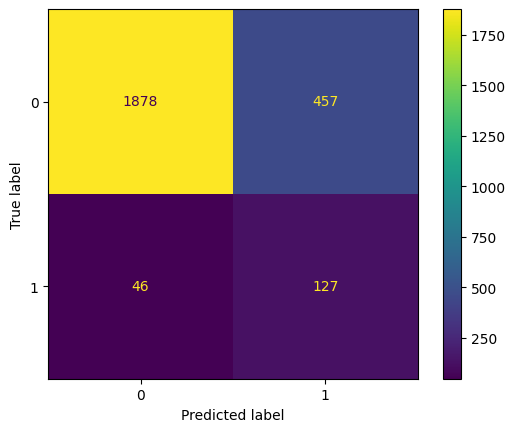

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar matriz de confusión con estilo sklearn
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)


- La evaluación del modelo de regresión logística sobre el conjunto de test muestra un rendimiento coherente con los objetivos del proyecto. El modelo alcanza un recall de 0.73 en la clase positiva (impago), lo que indica que detecta correctamente el 73% de los casos de impago. Este resultado es especialmente relevante en contextos de scoring crediticio, donde minimizar los falsos negativos es prioritario.

- La precisión en la clase positiva es baja (0.22), lo cual es esperable en modelos que priorizan el recall. Esto implica que, aunque el modelo detecta muchos impagos, también clasifica como impago a clientes que sí pagan (falsos positivos). Este comportamiento se confirma en la matriz de confusión:

    - Verdaderos positivos (TP): 127 → impagos correctamente detectados
    - Falsos negativos (FN): 46 → impagos no detectados
    - Falsos positivos (FP): 457 → pagadores marcados erróneamente como impago
    - Verdaderos negativos (TN): 1878 → pagadores correctamente clasificados

- La accuracy global del modelo es del 80%, y el macro recall alcanza 0.77, lo que refleja un buen equilibrio entre ambas clases. La matriz de confusión muestra que el modelo es eficaz en la detección de impagos, aunque a costa de una mayor tasa de falsos positivos, lo cual es aceptable en este tipo de problemas.

- En conjunto, el modelo generaliza correctamente, mantiene el comportamiento observado en entrenamiento, y cumple con el objetivo principal: maximizar la detección de impagos para reducir el riesgo financiero.

**¿Hay overfitting?**

- No hay overfitting. Porque:

    - El recall en train (0.75) y en test (0.73) son muy parecidos
    - La accuracy en train (0.79) y en test (0.80) también son muy similares

- Si hubiera overfitting se veria algo así:

    - Recall train = 0.95
    - Recall test = 0.40